<a href="https://colab.research.google.com/github/YOUSUBEEN/yousube_en/blob/main/Daily_study/20230417_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib + seaborn

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
from matplotlib.ticker import (MultipleLocator, AutoLocator, FuncFormatter)

def major_formatter(x, pos):
  return "%.2f$" % x

formatter =  FuncFormatter(major_formatter)

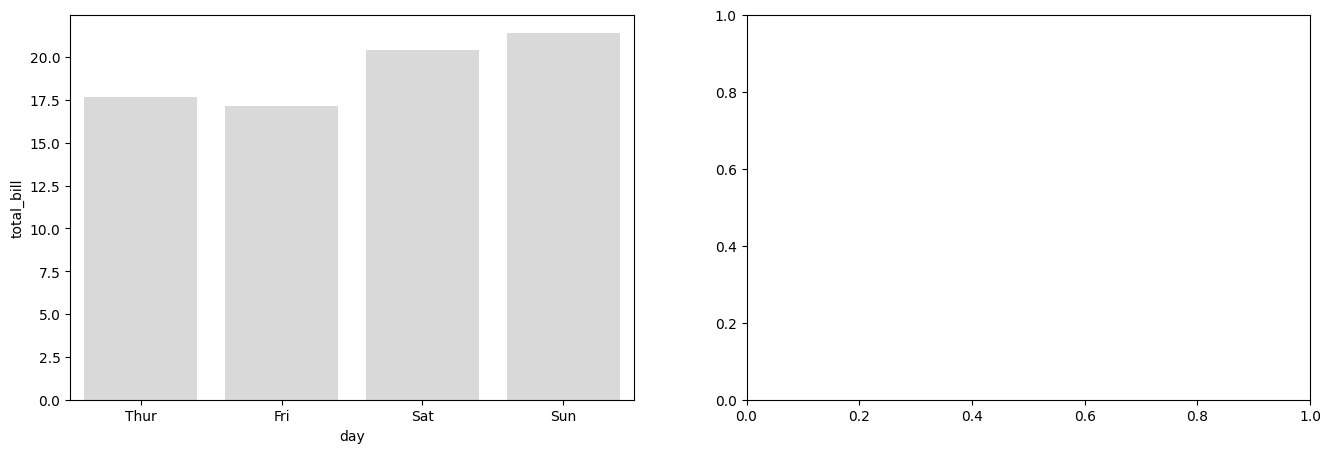

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
sns.barplot(x = 'day'              
            , y = 'total_bill'
            , data = tips
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0])


plt.show()

In [100]:
from os import access
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
print(h_day, h_mean)

Sun 21.41


Sun 21.41


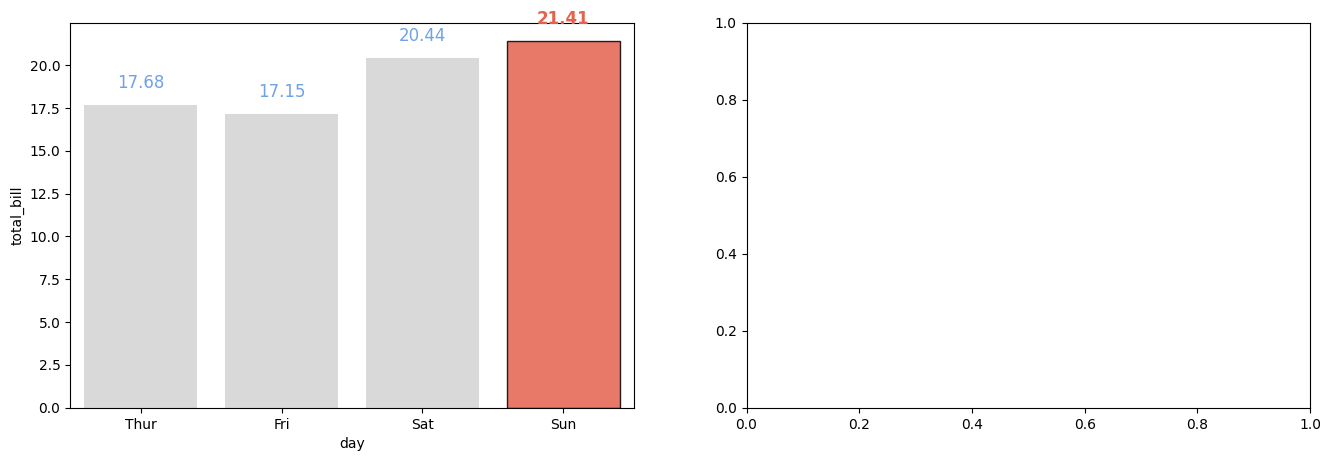

In [101]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
ax0 = sns.barplot(x = 'day'              
            , y = 'total_bill'
            , data = tips
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0])

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
print(h_day, h_mean)

for p in ax0.patches:
  fontweight = 'normal'
  color = '#70A2E6'
  height = np.round(p.get_height(), 2)
  # print(height)
  if h_mean == height:
    fontweight = 'bold'
    color = '#E5614C'  
    p.set_facecolor(color)    #막대색
    p.set_edgecolor("black")  #막대테두리

  ax0.text(p.get_x() + p.get_width()/2.,
           height + 1,
           height,
           ha = 'center',
           size = 12,
           fontweight = fontweight,
           color = color)



plt.show()

https://color.adobe.com/ko/create/color-wheel : 컬러

Sun 21.41


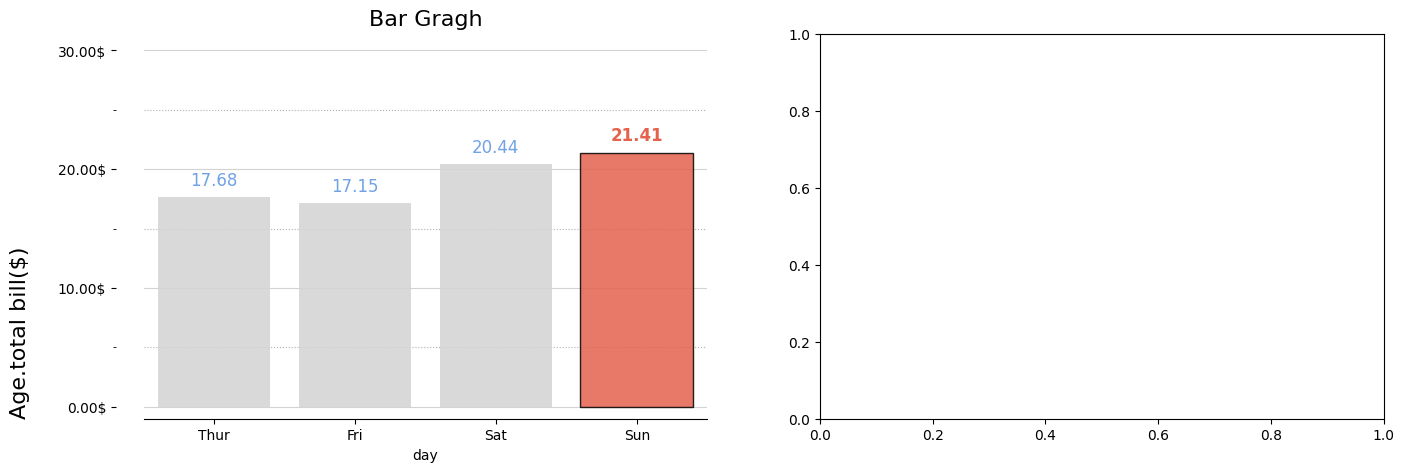

In [102]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
ax0 = sns.barplot(x = 'day'              
            , y = 'total_bill'
            , data = tips
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0]
            , zorder = 2)

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
print(h_day, h_mean)

for p in ax0.patches:
  fontweight = 'normal'
  color = '#70A2E6'
  height = np.round(p.get_height(), 2)
  # print(height)
  if h_mean == height:
    fontweight = 'bold'
    color = '#E5614C'  
    p.set_facecolor(color)    #막대색
    p.set_edgecolor("black")  #막대테두리

  ax0.text(p.get_x() + p.get_width()/2.,
           height + 1,
           height,
           ha = 'center',
           size = 12,
           fontweight = fontweight,
           color = color)

ax0.set_ylim(-1, h_mean + 10)
ax0.set_title("Bar Gragh", size = 16)

ax0.spines['top'].set_visible(False)  # 위에 줄 제거
ax0.spines['left'].set_visible(False) # 왼쪽 줄 제거
ax0.spines['left'].set_position(("outward",20))  #왼쪽 y축과의 거리 
ax0.spines['right'].set_visible(False)  # 오른쪽 줄 제거

#y축 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))  
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel('Age.total bill($)', fontsize = 16, labelpad = 20, loc = 'bottom')

#배경선
ax0.grid(axis = 'y', which = 'major', color = 'lightgray') # 주선
ax0.grid(axis = 'y', which = 'minor', ls = ':')   #보조선

plt.show()

# Plotly

In [103]:
import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})
df

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [104]:
import plotly
print(plotly.__version__)

5.13.1


In [105]:
import plotly.graph_objects as go
fig = go.Figure()

fig.show()

In [106]:
import plotly.graph_objects as go 
fig = go.Figure()
for contestant, group in df.groupby('Contestant'):
  fig.add_trace(go.Bar(x=group["Fruit"], y=group["Number Eaten"], name=contestant,
    hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))

fig.update_layout(title = 'graph_objects Plot', legend_title_text = 'Contestant')
fig.update_xaxes(title_text = 'Fruit')
fig.update_yaxes(title_texxt = 'Number Eaten')
fig.show()

# express 

https://plotly.com/python/plotly-express/

https://libgen.is/

In [107]:
import plotly.express as px
fig = px.bar(df, x = 'Fruit', y = 'Number Eaten', 
             color = 'Contestant', barmode = 'group')
fig.update_layout(title = 'Express Chart')
fig.show()

## 데이터 불러오기
- raw_sales.csv 파일 불러오기


In [108]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/연세IT/data/'
DATA_PATH

'/content/drive/MyDrive/Colab Notebooks/연세IT/data/'

In [110]:
import pandas as pd

sales = pd.read_csv(DATA_PATH + "raw_sales.csv", encoding = 'cp949', parse_dates=['datesold'])  # parse_dates=['해당컬럼']: object -> datetime으로 변경 
sales.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [111]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [112]:
# 컬럼명 :  year / year 추출
sales['year'] = sales['datesold'].dt.year
sales.head()

# groupby 연산, 기준컬럼 year, 대상컬럼 'price , 평균

result = sales.groupby('year')['price'].agg('mean')   #agg집합
result  = pd.DataFrame(result).reset_index()
result

,year,price
0,2007,522377.210884
1,2008,493814.162754
2,2009,496092.032959
3,2010,559564.810289
4,2011,566715.110227
5,2012,552501.369214
6,2013,553416.296838
7,2014,592653.761439
8,2015,626101.342654
9,2016,635185.311668


In [113]:
fig = px.line(result, x = 'year', y = 'price') 
fig.show()

### # 데이터 가공X 
- 그룹화해야함 중복되는 값이 있기 때문에(x는 중복값이 있으면 안된다!!!!!!!!!!)

In [114]:
# 데이터 가공X 
## 그룹화해야함 중복되는 값이 있기 때문에(x는 중복값이 있으면 안된다!!!!!!!!!!)
 
import plotly.express as px
fig = px.line(sales, x = 'datesold', y = 'price') 
fig.show()

In [115]:
import pandas as pd

sales = pd.read_csv(DATA_PATH + "raw_sales.csv", encoding = 'cp949', parse_dates=['datesold'])  # parse_dates=['해당컬럼']: object -> datetime으로 변경 
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   year          29580 non-null  int64         
 6   month         29580 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.6+ MB


In [116]:
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [117]:
# 2008, 2018년 데이터만 추출

result = sales[sales['year'].isin([2008, 2018])] 
result.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1


In [118]:
import numpy as np

result =  np.round(result.groupby(['year', 'month'])['price'].agg(np.mean).reset_index(),2)  #reset_index() : 데이터프레임으로 바꿔줌
result

,year,month,price
0,2008,1,504428.57
1,2008,2,531080.00
2,2008,3,563500.00
3,2008,4,534204.55
4,2008,5,522394.74
5,2008,6,539092.65
6,2008,7,537453.12
7,2008,8,449510.42
8,2008,9,496778.65
9,2008,10,454822.04


In [119]:
type(result)

pandas.core.frame.DataFrame

In [120]:
import plotly.express as px 

fig = px.line(result, x = 'month', y = 'price', color = 'year') 

# 배경색 설정하는 방법
fig.update_layout(
    plot_bgcolor='white',  # 그래프 영역 배경색
    paper_bgcolor='white'  # 전체 그래프 영역 배경색
)

fig.show()



In [121]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [122]:
import plotly.express as px

pio.templates.default = 'plotly_white'
fig = px.line(result, x = 'month', y = 'price', color = 'year') 
fig.show()

## 막대 그래프


In [123]:
import plotly.graph_objects as gp
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default ='plotly_white'

fig = make_subplots(rows = 2, 
                    cols = 1,
                    subplot_titles=("1 Chart", "2 Chart"))

for i, year in enumerate([2008, 2018]):
  data = result[result['year'] == year]
  fig.add_trace(go.Bar(x = data['month'],
                       y =data['price'], name = str(year)), row = i+1, col=1)
fig.show()

In [124]:
sales.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7
29579,2019-07-26,2612,775000,unit,2,2019,7


##px.box()

In [128]:
#px.box()
#x축 : 2007, 2008, 2009, 2010년
# y축 : price
#propertyType : house, unit

result = sales[sales['year'].isin([2007, 2008, 2009, 2010])] 
result = result[result['price'] <= 2000000]
fig = px.box(result, x = 'year', y = 'price', color = 'propertyType')
fig.show()